## Import the common libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from IPython.display import display, HTML
%matplotlib inline

In [3]:
yelp = pd.read_csv('../../6 - NPL files/yelp_training_set_review(with text_length and transformed).csv')

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           229907 non-null  object
 1   review_id         229907 non-null  object
 2   stars             229907 non-null  int64 
 3   date              229907 non-null  object
 4   text              229901 non-null  object
 5   type              229907 non-null  object
 6   business_id       229907 non-null  object
 7   funny             229907 non-null  int64 
 8   useful            229907 non-null  int64 
 9   cool              229907 non-null  int64 
 10  text_length       229907 non-null  int64 
 11  text_transformed  229891 non-null  object
dtypes: int64(5), object(7)
memory usage: 21.0+ MB


In [5]:
yelp['text_transformed'] = yelp['text_transformed'].astype('str')

# EDA

## How is the distribution of the length of review compared to different stars?

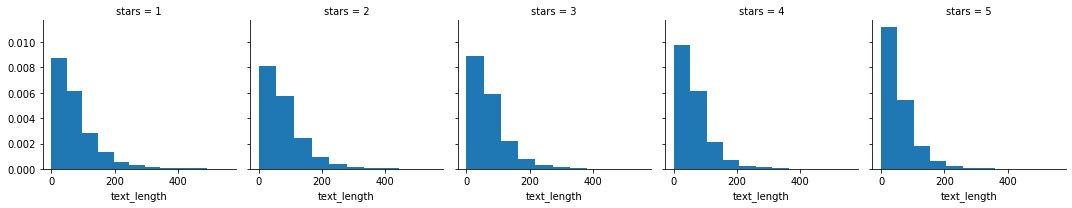

In [37]:
g = sns.FacetGrid(data=yelp,col='stars')
g = g.map(plt.hist, "text_length", density=True)

The most obverse trend is that there are more short reviews for better rating.

This make sense that there is not much to say if the experience is good

## Compare the skewness of the distributions

Text(0, 0.5, 'skewness')

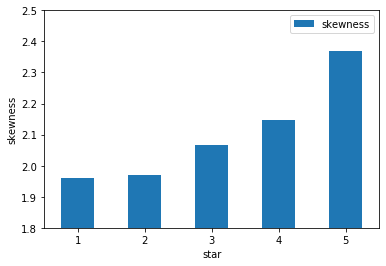

In [41]:
skewness = []
for i in range(1,6):
    subdata = yelp[yelp['stars']==i]["text_length"]
    skewness.append(scipy.stats.skew(subdata))
skewness_stars = pd.DataFrame(skewness,index=[i for i in range(1,6)], columns=['skewness'])
skewness_stars.plot.bar(ylim=[1.8,2.5], rot=0)
plt.xlabel('star')
plt.ylabel('skewness')

The higher the star, the larger portion of the review is short.

## What about the spread of the length of the reviews?
### Create a boxplot of text length for each star category.

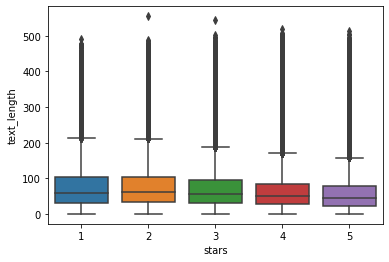

In [6]:
sns.boxplot(data=yelp, x='stars', y='text_length')

The majority, i.e. 75%, of the review  for each star category has less than 100 words in it.

Highly skewed distribtion with more outliners.

## how much the number of data for each category are different?
### This is important for the ML training later
### Create a countplot of the number of occurrences for each type of star rating.

In [7]:
yelp['stars'].value_counts()

4    79878
5    76193
3    35363
2    20957
1    17516
Name: stars, dtype: int64

Text(0.5, 1.0, 'ratings counts')

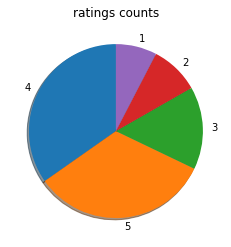

In [8]:
plt.pie(yelp['stars'].value_counts(), 
        labels=yelp['stars'].value_counts().index,
        shadow=True, startangle=90)
plt.title('ratings counts')

## find the underlying correlations to rating if any

In [43]:
stars_corr = yelp.groupby('stars').mean().reset_index().corr()

(0.8, 1.1)

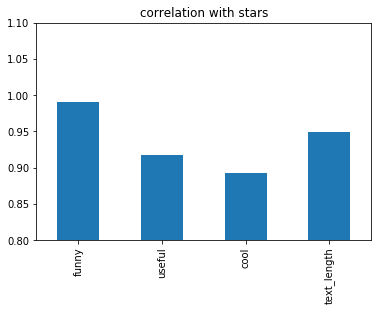

In [44]:
stars_corr['stars'][1:].apply(abs).plot.bar()
plt.title('correlation with stars')
plt.ylim([0.8,1.1])

'funny' and 'text_length' could be additional features besides 'text'

## Word Cloud

In [45]:
from wordcloud import WordCloud

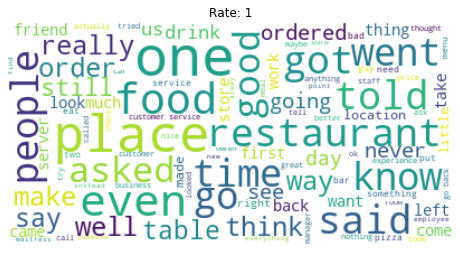

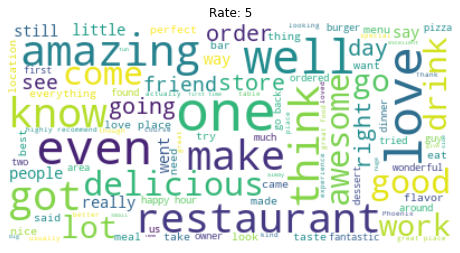

In [46]:
for k in [1,5]:
    text_all = ''
    for i in yelp[yelp.stars==k]['text_transformed']:
        text_all += ' '
        text_all += i
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_all)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Rate: {}'.format(k))